# 1. Importación de librerías

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Lectura de datos

In [27]:
songs = pd.read_csv('spotify_songs.csv')

In [28]:
songs.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


# 3. Descripción de los datos

## 3.1. Análisis dimensional

In [29]:
print('Número de registros: ', songs.shape[0])
print('Número de columnas: ', songs.shape[1])
print('Número de canciones analizadas: ', songs['track_id'].nunique())

Número de registros:  32833
Número de columnas:  23
Número de canciones analizadas:  28356


## 3.2. Tipos de datos y análisis de valores faltantes

In [30]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

Tal y como observamos, tenemos un total de 32.833 registros, y en ninguna de las columnas tenemos valores nulos, por lo que no se debe realizar ningún procedimiento de imputación y eliminación de valores nulos.

De igual forma, observamos que tenemos variables de identificación tales como los IDs y nombres de las canciones, álbumes o artistas, variables que son de tipo 'object'. De igual forma, tenemos variables de contenido como la popularidad de la canción (entero), o la bailabilidad, energía y valencia de la canción (tipo double).

## 3.3. Descripción de las variables

* track_id: Identificador único de la canción.
* track_name: Nombre de la canción.
* track_artist: Artista de la canción.
* track_popularity: Popularidad de la canción entre 0 y 100, donde entre más grande el número, mayor es la popularidad.
* track_album_id: Identificador único del album.
* track_album_name: Nombre del álbum de la canción.
* track_album_release_date: Fecha de lanzamiento del álbum.
* playlist_name: Nombre de la playlist.
* playlist_id: Identificador único de la playlist.
* playlist_genre: Género de la playlist.
* playlist_subgenre: Subgénero de la playlist.
* danceability (bailabilidad): describe cuán adecuada es la pista para bailar basada en una combinación de elementos musicales que incluyen tempo, estabilidad de ritmo, fuerza de ritmo y regularidad general. Un valor de 0.0 es menos bailable y 1.0 es el más bailable.
* energy (energía): La energía es una medida de 0.0 a 1.0 y representa una medida perceptiva de intensidad y actividad. Por lo general, las pistas enérgicas se sienten rápidas, fuertes y ruidosas. Por ejemplo, el death metal tiene alta energía, mientras que un preludio de Bach obtiene un puntaje bajo en la escala. Las características perceptivas que contribuyen a este atributo incluyen el rango dinámico, el volumen percibido, el timbre, la tasa de inicio y la entropía general.
* key (llave): La clave general estimada de la pista. Se asignan enteros a lanzamientos utilizando notación de clase de tono estándar. P.ej. 0 = C, 1 = C♯/D ♭, 2 = D, y así sucesivamente. Si no se detectó ninguna clave, el valor es -1.
* loudness (volumen): El volumen general de una pista en Decibels (DB). Los valores de volumen se promedian en toda la pista y son útiles para comparar el volumen relativo de las pistas. El volumen es la calidad de un sonido que es el correlato psicológico primario de la fuerza física (amplitud). Los valores rango típico se encuentran entre -60 y 0 dB.
* mode: El modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor está representado por 1 y menor es 0.
* speechiness (habla): El habla detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente segmera la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cerca de 1.0 el valor del atributo. Los valores superiores a 0.66 describen pistas que probablemente se hagan completamente de palabras habladas. Los valores entre 0.33 y 0.66 describen pistas que pueden contener música y habla, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores por debajo de 0.33 probablemente representan la música y otras pistas sin voz.
* acousticness (acústica): Una medida de confianza de 0.0 a 1.0 de si la pista es acústica. 1.0 representa una alta confianza, la pista es acústica.
* instrumentalness (instrumentalidad): Predice si una pista no contiene voces. Los sonidos "OOH" y "AAH" se tratan como instrumentales en este contexto. Las pistas de rap o palabras habladas son claramente "vocales". Cuanto más cerca sea el valor de instrumentalidad a 1.0, mayor es la probabilidad de que la pista no contenga contenido vocal. Los valores superiores a 0.5 están destinados a representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1.0.
* liveness (en vivo): detecta la presencia de una audiencia en la grabación. Los valores de liveness más altos representan una mayor probabilidad de que la pista se haya realizado en vivo. Un valor superior a 0.8 proporciona una fuerte probabilidad de que la pista esté en vivo.
* valence (valencia): una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, triste, deprimida, enojada).
* tempo: el tempo estimado general de una pista en ritmos por minuto (BPM). En la terminología musical, el tempo es la velocidad o el ritmo de una pieza dada y se deriva directamente de la duración promedio del latido.
* duration_ms: Duración de la canción en milisegundos.

## 3.4. Análisis descriptivo

### 3.4.1. Resumen descriptivo

A continuación, se presenta un resumen descriptivo de las variables numéricas:

In [31]:
songs.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


### 3.4.2. Análisis gráfico de la distribución de los datos

Inicialmente, exploramos la distribución de frecuencias de los subgéneros de las canciones a través de un gráfico de barras:

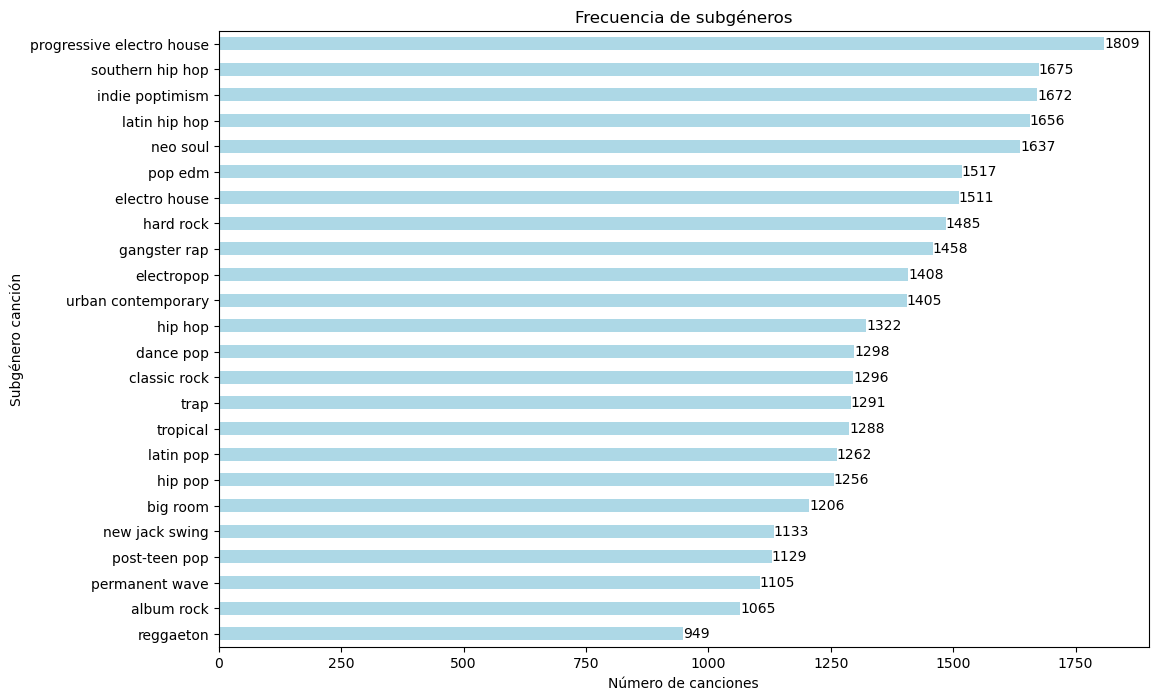

In [38]:
conteo_subgeneros = datos['playlist_subgenre'].value_counts()

conteo_subgeneros = conteo_subgeneros.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
conteo_subgeneros.plot(kind='barh', color='lightblue')

plt.gca().invert_yaxis()

for index, value in enumerate(conteo_subgeneros):
    plt.text(value, index, str(value), va='center', fontsize=10)

plt.title('Frecuencia de subgéneros')
plt.xlabel('Número de canciones')
plt.ylabel('Subgénero canción')

plt.show()

De igual forma, construimos un gráfico de torta para la variable binaria 'mode' o modalidad, como sigue:

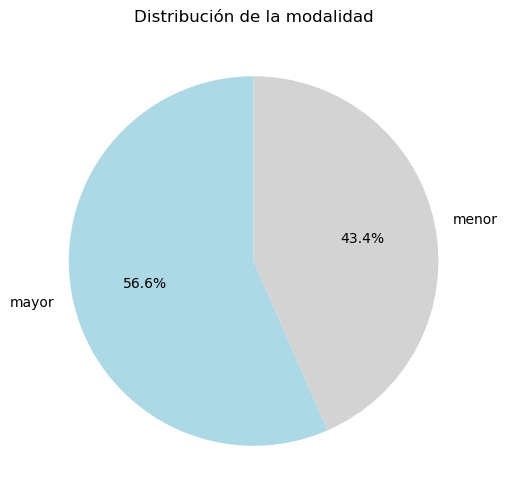

In [42]:
conteo_mode = songs['mode'].value_counts()

labels = ['mayor' if x == 1 else 'menor' for x in conteo_mode.index]

colors = ['lightblue' if label == 'mayor' else 'lightgray' for label in labels]

plt.figure(figsize=(6, 6))
plt.pie(conteo_mode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('Distribución de la modalidad')

plt.show()

Finalmente, construimos histogramas para las variables numéricas:

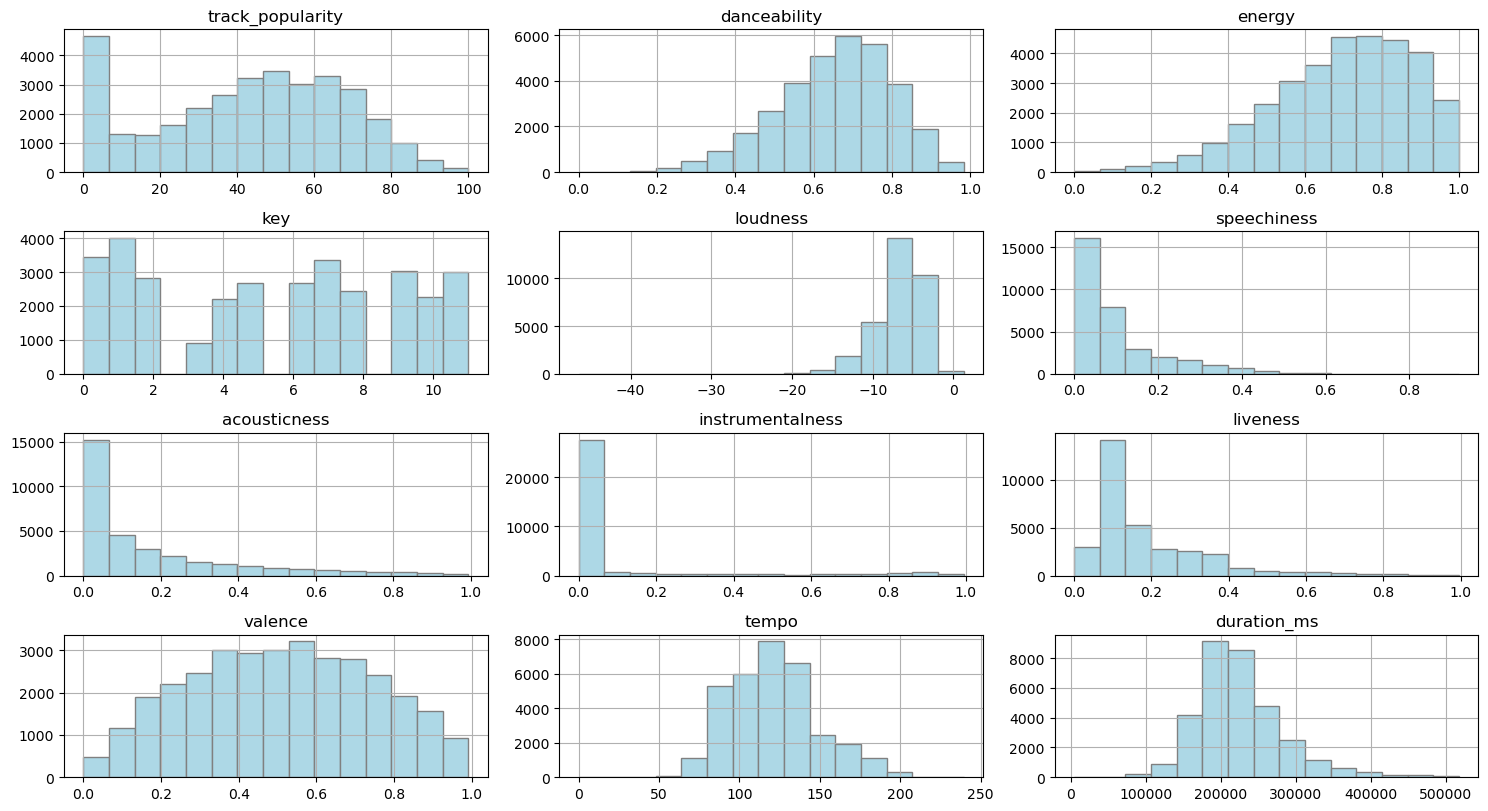

In [40]:
columnas_numericas = songs.select_dtypes(include=['number']).drop(columns=['mode']).columns

songs[columnas_numericas].hist(bins=15, color='lightblue', edgecolor='gray', figsize=(15, 10), layout=(len(columnas_numericas) // 3 + 1, 3))

plt.tight_layout()

plt.show()

### 3.4.3. Análisis de correlaciones

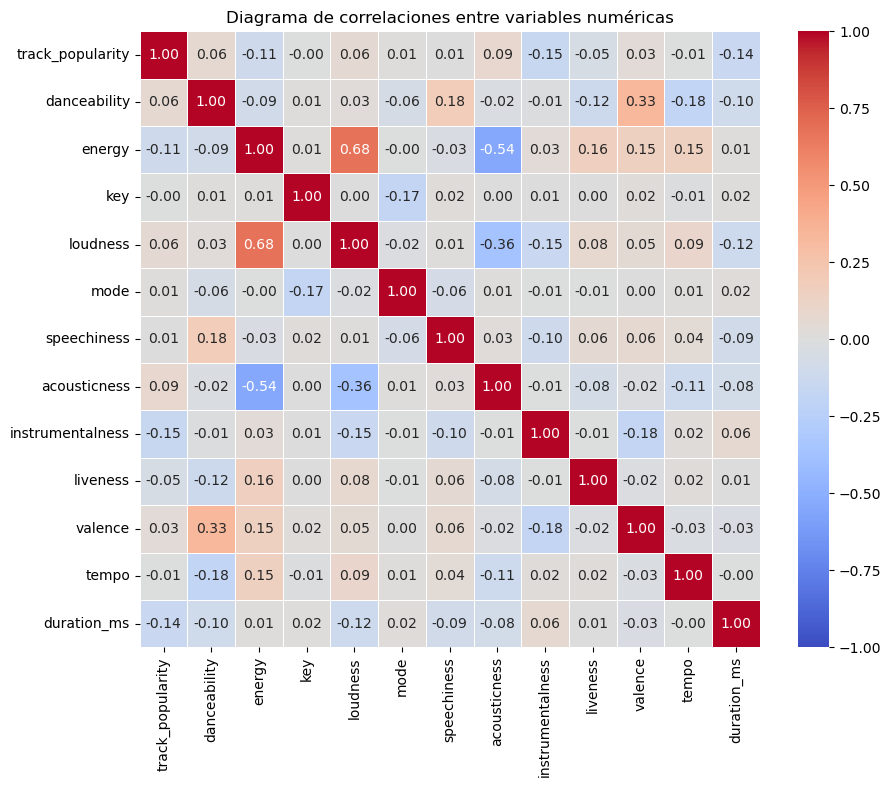

In [44]:
columnas_numericas = songs.select_dtypes(include=['number'])

matriz_correlaciones = columnas_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Diagrama de correlaciones entre variables numéricas')

plt.show()